# Build a Classification Model to Predict Candidate Affiliation and Compare with Election Results

In [52]:
!pip install pandas numpy scikit-learn matplotlib seaborn geopandas textblob wordcloud emoji

In [2]:
# Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split





In [3]:
# Load dataset
def load_data():
    return pd.read_csv(r"E:\Redi School\Data Circle 2024\Project\DataCircle_Twitter_Project\twitter_cleaned_data_update.csv", lineterminator='\n')

twitter_df = load_data()

# Clean column names and adjust formatting
twitter_df.columns = twitter_df.columns.str.replace('\r', '')
twitter_df['country'] = twitter_df['country'].str.replace('\r', '')

# Convert created_at to datetime
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'], errors='coerce')

In [4]:
# Display column names
print("Column Names:")
print(twitter_df.columns)

Column Names:
Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_join_date', 'user_followers_count', 'user_location',
       'city', 'state', 'candidate', 'tweet_cleaned', 'country'],
      dtype='object')


In [5]:
# Display unique values for each column
print("\nUnique Values in Each Column:")
for column in twitter_df.columns:
    unique_values = twitter_df[column].unique()
    print(f"\n{column} ({len(unique_values)} unique values):")
    print(unique_values[:10])  # Display the first 10 unique values
    if len(unique_values) > 10:
        print("...")  # Indicate there are more values


Unique Values in Each Column:

created_at (705871 unique values):
<DatetimeArray>
['2020-10-15 00:00:02', '2020-10-15 00:00:08', '2020-10-15 00:00:17',
 '2020-10-15 00:00:18', '2020-10-15 00:00:20', '2020-10-15 00:00:21',
 '2020-10-15 00:00:26', '2020-10-15 00:00:31', '2020-10-15 00:00:42',
 '2020-10-15 00:00:55']
Length: 10, dtype: datetime64[ns]
...

tweet_id (1013982 unique values):
[1316529228091846912 1316529227471237120 1316529252301451264
 1316529291052675072 1316529289949569024 1316529293497962496
 1316529301332918272 1316529308576309248 1316529328608481280
 1316529349290586112]
...

tweet (1002449 unique values):
["#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?"
 '2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.'
 'You get a tie! An

In [21]:
# Prepare data for modeling
X = twitter_df['tweet_cleaned']
y = twitter_df['candidate'].apply(lambda x: 1 if x == 'biden' else 0)  # 1 for Biden, 0 for Trump

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    119046
           1       0.97      0.97      0.97     83755

    accuracy                           0.98    202801
   macro avg       0.98      0.98      0.98    202801
weighted avg       0.98      0.98      0.98    202801



# Confusion Matrix:

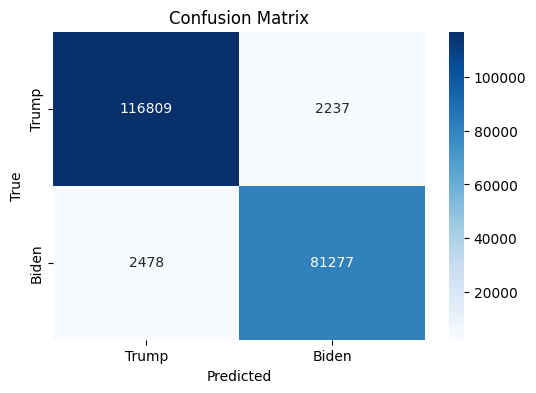

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Trump", "Biden"], yticklabels=["Trump", "Biden"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC curve

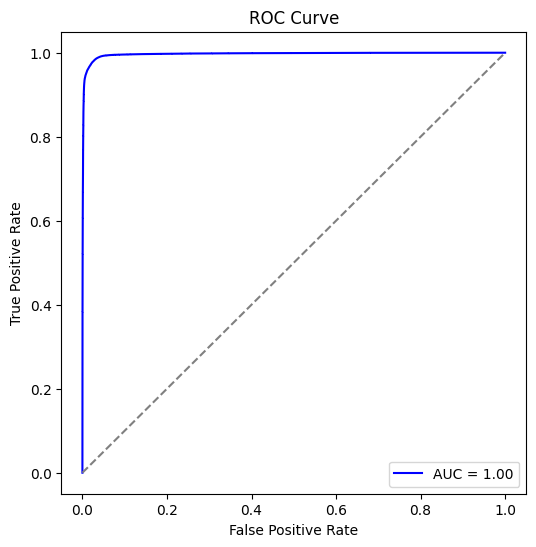

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vec)[:, 1])
auc = roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1])

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Most important words to define the candidate

In [11]:
# Example data and setup
feature_names = vectorizer.get_feature_names_out()  # Get feature names from the vectorizer
coefficients = model.coef_[0]  # Get the coefficients from the trained logistic regression model

# Create the DataFrame
top_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

C:\Users\nahid\AppData\Local\Temp\ipykernel_8456\3731879336.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


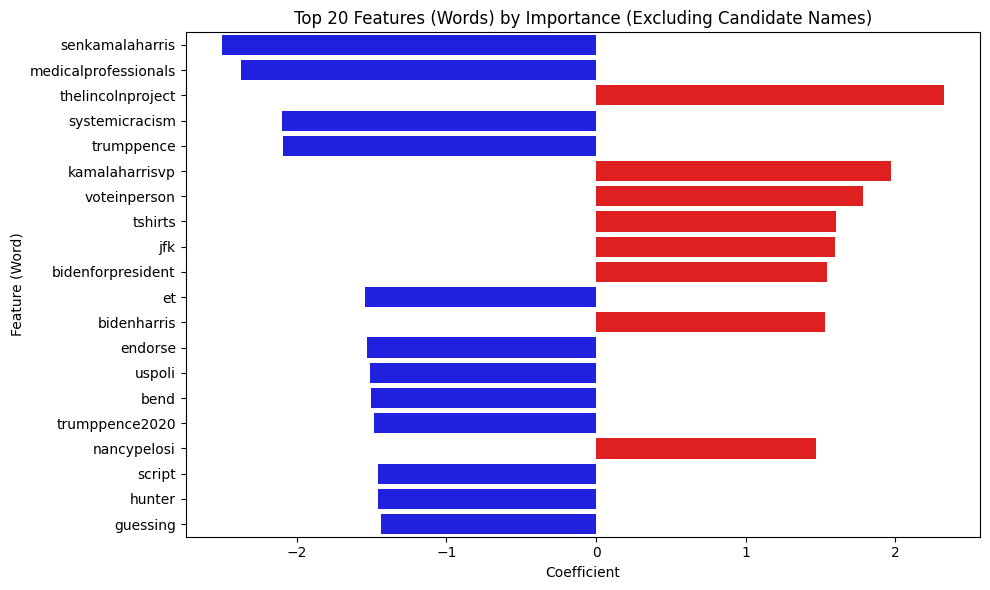

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


# List of candidate names to exclude
exclude_words = ['biden', 'bidens', 'trump', 'trumps', 'joebiden', 'joebidens', 'donaldtrump', 'donaldtrumps', 'donald']

# Remove candidate names from the top features
top_features_filtered = top_features[~top_features['Feature'].str.lower().isin([word.lower() for word in exclude_words])]

# Sort by absolute value of coefficients and select top 20
top_features_filtered = top_features_filtered.assign(AbsCoefficient=top_features_filtered['Coefficient'].abs())
top_features_filtered = top_features_filtered.sort_values(by='AbsCoefficient', ascending=False).head(20)

# Assign colors based on the sign of the coefficient
# Red for Trump (positive coefficients), Blue for Biden (negative coefficients)
top_features_filtered['Color'] = top_features_filtered['Coefficient'].apply(
    lambda x: 'red' if x > 0 else 'blue'
)

# Plot top 20 features with positive (Trump) and negative (Biden) coefficients
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=top_features_filtered,
    palette=top_features_filtered['Color'].tolist()  # Convert 'Color' column to list
)

plt.title("Top 20 Features (Words) by Importance (Excluding Candidate Names)")
plt.xlabel("Coefficient")
plt.ylabel("Feature (Word)")
plt.tight_layout()
plt.show()


# Function to classify input tweet

In [17]:
# Mapping of class labels to candidate names
class_mapping = {0: 'Biden', 1: 'Trump'}

# Function to classify input tweet
def classify_tweet(tweet):
    tweet_vec = vectorizer.transform([tweet])
    prediction = model.predict(tweet_vec)[0]
    candidate = class_mapping[prediction]  # Map the numerical prediction to candidate name
    return f"The tweet is likely from a {candidate.upper()} supporter."

# Example: User input
input_tweet = input("Enter a tweet: ")
print(classify_tweet(input_tweet))

The tweet is likely from a TRUMP supporter.


In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [60]:
# Load voting results
voting_df = pd.read_csv(r"E:\Redi School\Data Circle 2024\Project\DataCircle_Twitter_Project\voting.csv")


# Standardize column names
voting_df['state'] = voting_df['state'].str.title()
twitter_df['state'] = twitter_df['state'].str.title()


In [61]:
# Filter Twitter data for rows where the country is 'United States'
twitter_df_us = twitter_df.query("country == 'united states'").copy()

# Merge with voting data again (to ensure alignment after filtering)
twitter_df_us = twitter_df_us.merge(voting_df, on='state', how='left')

# Check for missing data
print(twitter_df_us[['state', 'winning_candidate']].drop_duplicates())

                           state winning_candidate
0                         Oregon             Biden
1           District Of Columbia             Biden
2                     California             Biden
3                           Ohio             Trump
4                   Pennsylvania             Biden
6                       Michigan             Biden
7                        Unknown               NaN
9                        Florida             Trump
10                      Illinois             Biden
15                    New Jersey             Biden
20                 Massachusetts             Biden
22                 New Hampshire             Biden
25                         Texas             Trump
28                  South Dakota             Trump
30                       Georgia             Biden
35                      Missouri             Trump
36                      New York             Biden
41                      Colorado             Biden
52                       Alabam

In [62]:
twitter_df_us = twitter_df_us[~twitter_df_us['state'].isin(['Unknown', 'Guam', 'Northern Mariana Islands'])]


In [63]:
from textblob import TextBlob

# Define sentiment analysis functions
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
twitter_df['polarity'] = twitter_df['tweet_cleaned'].apply(get_polarity)
twitter_df['sentiment'] = twitter_df['polarity'].apply(get_sentiment)

# Verify sentiment column
print(twitter_df[['tweet_cleaned', 'polarity', 'sentiment']].head())

                                       tweet_cleaned  polarity sentiment
0  #trump student used hear years ten years heard...  0.333333  positive
1  2 hours since last tweet #trump maybe busy tre...  0.066667  positive
2                 get tie get tie #trump rally #iowa  0.000000   neutral
3  clady62 15 minutes long time ago omarosa never... -0.108333  negative
4       richardmarx glad u got house dick#trump 2020  0.500000  positive


# Analyze Sentiment by State

In [64]:
# Filter for U.S. data
twitter_df_us = twitter_df.query("country == 'united states'").copy()

# Ensure state names are standardized
twitter_df_us['state'] = twitter_df_us['state'].str.title()
voting_df['state'] = voting_df['state'].str.title()

# Merge with voting data
twitter_df_us = twitter_df_us.merge(voting_df, on='state', how='left')


In [65]:
# Group by state, candidate, and sentiment
state_sentiment_us = (
    twitter_df_us.groupby(['state', 'candidate', 'sentiment'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Add the winning candidate to the sentiment table
state_sentiment_us = state_sentiment_us.merge(voting_df, on='state', how='left')

# Display results
print(state_sentiment_us.head())

     state candidate  negative  neutral  positive state_abr  trump_pct  \
0  Alabama     biden       117      281       242        AL       62.2   
1  Alabama     trump       144      287       248        AL       62.2   
2   Alaska     biden        84      146       128        AK       53.1   
3   Alaska     trump        44       96       111        AK       53.1   
4  Arizona     biden       494     1023       995        AZ       49.1   

   biden_pct  trump_vote  biden_vote winning_candidate  
0       36.7   1441170.0    849624.0             Trump  
1       36.7   1441170.0    849624.0             Trump  
2       43.0    189543.0    153502.0             Trump  
3       43.0    189543.0    153502.0             Trump  
4       49.4   1661686.0   1672143.0             Biden  


In [66]:
# Calculate the average polarity for each state and candidate
avg_polarity_df = (
    twitter_df_us.groupby(['state', 'candidate'])['polarity']
    .mean()
    .reset_index()
    .rename(columns={'polarity': 'avg_polarity'})
)

# Add the winning candidate (actual result) to the DataFrame
avg_polarity_df = avg_polarity_df.merge(voting_df[['state', 'winning_candidate']], on='state', how='left')

# Pivot to compare average polarity between candidates in the same state
polarity_comparison = avg_polarity_df.pivot(index='state', columns='candidate', values='avg_polarity').reset_index()

# Determine the predicted candidate based on higher average polarity
polarity_comparison['predicted_candidate'] = polarity_comparison.apply(
    lambda row: 'biden' if row.get('biden', 0) > row.get('trump', 0) else 'trump', axis=1
)

# Merge the predicted candidate back into the main dataframe
avg_polarity_df = avg_polarity_df.merge(
    polarity_comparison[['state', 'predicted_candidate']],
    on='state',
    how='left'
)

# Display the updated DataFrame with the required columns
final_results = avg_polarity_df[['state', 'candidate', 'avg_polarity', 'winning_candidate', 'predicted_candidate']]
pd.set_option('display.max_rows', None)
print(final_results)

                        state candidate  avg_polarity winning_candidate  \
0                     Alabama     biden      0.074326             Trump   
1                     Alabama     trump      0.053562             Trump   
2                      Alaska     biden      0.054872             Trump   
3                      Alaska     trump      0.035820             Trump   
4                     Arizona     biden      0.072669             Biden   
5                     Arizona     trump      0.038347             Biden   
6                    Arkansas     biden      0.097863             Trump   
7                    Arkansas     trump      0.021671             Trump   
8                  California     biden      0.087938             Biden   
9                  California     trump      0.021053             Biden   
10                   Colorado     biden      0.077463             Biden   
11                   Colorado     trump      0.008479             Biden   
12                Connect

In [67]:
# Calculate the average polarity for each state and candidate
avg_polarity_df = (
    twitter_df_us.groupby(['state', 'candidate'])['polarity']
    .mean()
    .reset_index()
    .rename(columns={'polarity': 'avg_polarity'})
)

# Add the winning candidate (actual result) to the DataFrame
avg_polarity_df = avg_polarity_df.merge(voting_df[['state', 'winning_candidate']], on='state', how='left')

# Pivot to compare average polarity between candidates in the same state
polarity_comparison = avg_polarity_df.pivot(index='state', columns='candidate', values='avg_polarity').reset_index()

# Determine the predicted candidate based on higher average polarity
polarity_comparison['predicted_candidate'] = polarity_comparison.apply(
    lambda row: 'biden' if row.get('biden', 0) > row.get('trump', 0) else 'trump', axis=1
)

# Merge the predicted candidate back into the main dataframe
avg_polarity_df = avg_polarity_df.merge(
    polarity_comparison[['state', 'predicted_candidate']],
    on='state',
    how='left'
)

# Display the updated DataFrame with the required columns
final_results = avg_polarity_df[['state', 'candidate', 'avg_polarity', 'winning_candidate', 'predicted_candidate']]
pd.set_option('display.max_rows', None)
print(final_results)

                        state candidate  avg_polarity winning_candidate  \
0                     Alabama     biden      0.074326             Trump   
1                     Alabama     trump      0.053562             Trump   
2                      Alaska     biden      0.054872             Trump   
3                      Alaska     trump      0.035820             Trump   
4                     Arizona     biden      0.072669             Biden   
5                     Arizona     trump      0.038347             Biden   
6                    Arkansas     biden      0.097863             Trump   
7                    Arkansas     trump      0.021671             Trump   
8                  California     biden      0.087938             Biden   
9                  California     trump      0.021053             Biden   
10                   Colorado     biden      0.077463             Biden   
11                   Colorado     trump      0.008479             Biden   
12                Connect

In [75]:
# Pivot to ensure one row per state
state_results = avg_polarity_df.pivot(index='state', columns='candidate', values='avg_polarity').reset_index()

# Add actual winner from voting results
state_results = state_results.merge(voting_df[['state', 'winning_candidate']], on='state', how='left')

# Determine the predicted candidate based on polarity
state_results['predicted_candidate'] = state_results.apply(
    lambda row: 'biden' if row.get('biden', 0) > row.get('trump', 0) else 'trump', axis=1
)

In [77]:
# Reorder and rename columns for clarity
state_results = state_results.rename(columns={'biden': 'biden_polarity', 'trump': 'trump_polarity'})
state_results = state_results[['state', 'biden_polarity', 'trump_polarity', 'winning_candidate', 'predicted_candidate']]

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full DataFrame
print(state_results)

                       state  biden_polarity  trump_polarity  \
0                    Alabama        0.074326        0.053562   
1                     Alaska        0.054872        0.035820   
2                    Arizona        0.072669        0.038347   
3                   Arkansas        0.097863        0.021671   
4                 California        0.087938        0.021053   
5                   Colorado        0.077463        0.008479   
6                Connecticut        0.068134        0.027315   
7                   Delaware        0.096616        0.007393   
8       District Of Columbia        0.091394        0.029111   
9                    Florida        0.071901        0.047584   
10                   Georgia        0.076308        0.040058   
11                      Guam        0.125000       -0.333333   
12                    Hawaii        0.050536        0.010215   
13                     Idaho        0.051840        0.020522   
14                  Illinois        0.07

In [78]:
from IPython.display import display
display(state_results)

,state,biden_polarity,trump_polarity,winning_candidate,predicted_candidate
0,Alabama,0.074326,0.053562,Trump,biden
1,Alaska,0.054872,0.035820,Trump,biden
2,Arizona,0.072669,0.038347,Biden,biden
3,Arkansas,0.097863,0.021671,Trump,biden
4,California,0.087938,0.021053,Biden,biden
5,Colorado,0.077463,0.008479,Biden,biden
6,Connecticut,0.068134,0.027315,Biden,biden
7,Delaware,0.096616,0.007393,Biden,biden
8,District Of Columbia,0.091394,0.029111,Biden,biden
9,Florida,0.071901,0.047584,Trump,biden


In [80]:
# Drop rows where 'winning_candidate' is NaN
state_results_cleaned = state_results.dropna(subset=['winning_candidate'])

# Reset the index (optional, for a cleaner DataFrame)
state_results_cleaned.reset_index(drop=True, inplace=True)

from IPython.display import display
display(state_results_cleaned)

,state,biden_polarity,trump_polarity,winning_candidate,predicted_candidate
0,Alabama,0.074326,0.053562,Trump,biden
1,Alaska,0.054872,0.035820,Trump,biden
2,Arizona,0.072669,0.038347,Biden,biden
3,Arkansas,0.097863,0.021671,Trump,biden
4,California,0.087938,0.021053,Biden,biden
5,Colorado,0.077463,0.008479,Biden,biden
6,Connecticut,0.068134,0.027315,Biden,biden
7,Delaware,0.096616,0.007393,Biden,biden
8,District Of Columbia,0.091394,0.029111,Biden,biden
9,Florida,0.071901,0.047584,Trump,biden


In [82]:
# Assuming the dataframe is named df_final
state_results_cleaned['winning_candidate'].value_counts()

winning_candidate
Biden    26
Trump    25
Name: count, dtype: int64

# With VADAR

In [83]:
pip install vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------------------- -------------------- 61.4/126.0 kB ? eta -:--:--
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ---------------------------------------- 64.9/64.9 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ---------------------------------------- 102.2/102.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/70.4 kB ? eta -:--:--
   ---------------------------------------- 70.4/70.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.3 kB ? eta -:--:--
   ---------------------------------------- 126.3/126.3 kB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER polarity score
def get_vader_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # The compound score represents the overall sentiment

# Load your data
twitter_df = pd.read_csv(r"E:\Redi School\Data Circle 2024\Project\DataCircle_Twitter_Project\twitter_cleaned_data_update.csv", lineterminator='\n')

# Clean and preprocess data as required
twitter_df.columns = twitter_df.columns.str.replace('\r', '')
twitter_df['country'] = twitter_df['country'].str.replace('\r', '')
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'], errors='coerce')

# Apply VADER polarity function to the 'tweet_cleaned' column
twitter_df['vader_polarity'] = twitter_df['tweet_cleaned'].apply(get_vader_polarity)

# Classify sentiment based on the compound score
def get_vader_sentiment(compound_score):
    if compound_score > 0:
        return 'positive'
    elif compound_score == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment classification
twitter_df['vader_sentiment'] = twitter_df['vader_polarity'].apply(get_vader_sentiment)

# Verify sentiment results
print(twitter_df[['tweet_cleaned', 'vader_polarity', 'vader_sentiment']].head())


                                       tweet_cleaned  vader_polarity  \
0  #trump student used hear years ten years heard...         -0.2755   
1  2 hours since last tweet #trump maybe busy tre...          0.0000   
2                 get tie get tie #trump rally #iowa          0.0000   
3  clady62 15 minutes long time ago omarosa never...         -0.3818   
4       richardmarx glad u got house dick#trump 2020          0.4588   

  vader_sentiment  
0        negative  
1         neutral  
2         neutral  
3        negative  
4        positive  


In [85]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER polarity score
def get_vader_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Load your data
twitter_df = pd.read_csv(r"E:\Redi School\Data Circle 2024\Project\DataCircle_Twitter_Project\twitter_cleaned_data_update.csv", lineterminator='\n')
voting_df = pd.read_csv(r"E:\Redi School\Data Circle 2024\Project\DataCircle_Twitter_Project\voting.csv")

# Clean data as needed
twitter_df.columns = twitter_df.columns.str.replace('\r', '')
twitter_df['country'] = twitter_df['country'].str.replace('\r', '')
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'], errors='coerce')

# Apply VADER polarity function
twitter_df['vader_polarity'] = twitter_df['tweet_cleaned'].apply(get_vader_polarity)

# Classify sentiment based on the polarity score
def get_vader_sentiment(compound_score):
    if compound_score > 0:
        return 'positive'
    elif compound_score == 0:
        return 'neutral'
    else:
        return 'negative'

twitter_df['vader_sentiment'] = twitter_df['vader_polarity'].apply(get_vader_sentiment)

# Filter the data for the United States only
twitter_df_us = twitter_df.query("country == 'united states'").copy()

# Standardize the state names for merging
twitter_df_us['state'] = twitter_df_us['state'].str.title()
voting_df['state'] = voting_df['state'].str.title()

# Merge with voting data to get the actual winning candidate per state
twitter_df_us = twitter_df_us.merge(voting_df[['state', 'winning_candidate']], on='state', how='left')

# Group by state to calculate average polarity score for each state
avg_polarity_state = twitter_df_us.groupby('state')['vader_polarity'].mean().reset_index()

# Predict the winner based on average polarity
avg_polarity_state['predicted_candidate'] = avg_polarity_state['vader_polarity'].apply(
    lambda x: 'biden' if x > 0 else 'trump'
)

# Merge the predicted winners with the actual winners
final_results = avg_polarity_state.merge(voting_df[['state', 'winning_candidate']], on='state', how='left')

# Display the final results (state, predicted winner, actual winner)
print(final_results[['state', 'predicted_candidate', 'winning_candidate']].head())

        state predicted_candidate winning_candidate
0     Alabama               biden             Trump
1      Alaska               biden             Trump
2     Arizona               biden             Biden
3    Arkansas               trump             Trump
4  California               biden             Biden


In [87]:
# Drop rows where 'winning_candidate' is NaN
final_results_cleaned2 = final_results.dropna(subset=['winning_candidate'])

# Reset the index (optional, for a cleaner DataFrame)
final_results_cleaned2.reset_index(drop=True, inplace=True)

from IPython.display import display
display(final_results_cleaned2)

,state,vader_polarity,predicted_candidate,winning_candidate
0,Alabama,0.070709,biden,Trump
1,Alaska,0.067340,biden,Trump
2,Arizona,0.036657,biden,Biden
3,Arkansas,-0.028240,trump,Trump
4,California,0.036442,biden,Biden
5,Colorado,0.061813,biden,Biden
6,Connecticut,0.026141,biden,Biden
7,Delaware,0.038085,biden,Biden
8,District Of Columbia,0.016019,biden,Biden
9,Florida,0.033306,biden,Trump


In [22]:
!pip install streamlit